In [58]:
import pandas as pd
import numpy as np



In [59]:
m = pd.read_csv("mortality_missing_values.csv")

In [60]:
m.head()

,Year,AgeGroup,DeathRate
0,1900.0,01-04 Years,1983.8
1,NaN,01-04 Years,1695.0
2,1902.0,01-04 Years,NaN
3,1903.0,01-04 Years,1542.1
4,NaN,01-04 Years,NaN


In [61]:
m.shape

(476, 3)

In [62]:
# num of missing values across all cols
m.isnull().sum()

Year         3
AgeGroup     0
DeathRate    4
dtype: int64

In [63]:
m.isna().sum()

Year         3
AgeGroup     0
DeathRate    4
dtype: int64

In [64]:
# num of Non-null values, across all cols
m.notnull().sum()

Year         473
AgeGroup     476
DeathRate    472
dtype: int64

In [65]:
m['Year'].isnull()

0      False
1       True
2      False
3      False
4       True
       ...  
471    False
472    False
473    False
474    False
475    False
Name: Year, Length: 476, dtype: bool

In [66]:
# display all the rows that have a missing value in any column
m[m.isnull().any(axis=1)]

,Year,AgeGroup,DeathRate
1,NaN,01-04 Years,1695.0
2,1902.0,01-04 Years,NaN
4,NaN,01-04 Years,NaN
6,NaN,01-04 Years,NaN
7,1907.0,01-04 Years,NaN


In [67]:
m.shape[0]

476

In [68]:
m.shape[1]

3

In [69]:
m[m.isnull().any(axis=1)].shape[0]

5

In [70]:
#display those rows that contain missing values in the 'DeathRate' column
m[m.DeathRate.isnull()]

,Year,AgeGroup,DeathRate
2,1902.0,01-04 Years,NaN
4,NaN,01-04 Years,NaN
6,NaN,01-04 Years,NaN
7,1907.0,01-04 Years,NaN


In [71]:
#display those rows that donot contain missing values in the 'DeathRate' column
m[m.DeathRate.notnull()]

,Year,AgeGroup,DeathRate
0,1900.0,01-04 Years,1983.8
1,NaN,01-04 Years,1695.0
3,1903.0,01-04 Years,1542.1
5,1905.0,01-04 Years,1498.9
8,1908.0,01-04 Years,1396.8
...,...,...,...
471,2014.0,15-19 Years,45.5
472,2015.0,15-19 Years,48.3
473,2016.0,15-19 Years,51.2
474,2017.0,15-19 Years,51.5


Drop rows, based on conditions:


In [72]:
#Display those rows that contains 2 or more missing values:
m[m.isnull().sum(axis=1) >= 2]
    


,Year,AgeGroup,DeathRate
4,NaN,01-04 Years,NaN
6,NaN,01-04 Years,NaN


In [73]:
# Drop rows that have 2 or more missing values:
m.dropna(axis=0,thresh=2,inplace=False).head(10)



,Year,AgeGroup,DeathRate
0,1900.0,01-04 Years,1983.8
1,NaN,01-04 Years,1695.0
2,1902.0,01-04 Years,NaN
3,1903.0,01-04 Years,1542.1
5,1905.0,01-04 Years,1498.9
7,1907.0,01-04 Years,NaN
8,1908.0,01-04 Years,1396.8
9,1909.0,01-04 Years,1348.9
10,1910.0,01-04 Years,1397.3
11,1911.0,01-04 Years,1176.0


In [74]:
#Drop rows that have missing values in the 'DeathRate' col
m.dropna(subset=['DeathRate'],how='all',inplace=False)

,Year,AgeGroup,DeathRate
0,1900.0,01-04 Years,1983.8
1,NaN,01-04 Years,1695.0
3,1903.0,01-04 Years,1542.1
5,1905.0,01-04 Years,1498.9
8,1908.0,01-04 Years,1396.8
...,...,...,...
471,2014.0,15-19 Years,45.5
472,2015.0,15-19 Years,48.3
473,2016.0,15-19 Years,51.2
474,2017.0,15-19 Years,51.5


How to fill missing values , imputation

In [75]:
m.describe()

,Year,DeathRate
count,473.000000,472.000000
mean,1959.350951,181.221186
std,34.210953,265.215427
min,1900.000000,11.400000
25%,1930.000000,40.500000
50%,1959.000000,88.400000
75%,1989.000000,219.675000
max,2018.000000,1983.800000


we will be imputing the missing value in DeathRate with the mean value as it is suitable  for our analysis.

In [76]:
m.DeathRate.fillna(value = m.DeathRate.mean(), inplace=True)


C:\Users\sthaa\AppData\Local\Temp\ipykernel_17080\1370022981.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  m.DeathRate.fillna(value = m.DeathRate.mean(), inplace=True)


In [77]:
m.isnull().sum()

Year         3
AgeGroup     0
DeathRate    0
dtype: int64

Impute the missing values in 'Year'


In [78]:
m.Year.fillna(method='ffill',limit=2,inplace=True)

C:\Users\sthaa\AppData\Local\Temp\ipykernel_17080\3330270594.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  m.Year.fillna(method='ffill',limit=2,inplace=True)
C:\Users\sthaa\AppData\Local\Temp\ipykernel_17080\3330270594.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  m.Year.fillna(method='ffill',limit=2,inplace=True)


In [79]:
m.isnull().sum()

Year         0
AgeGroup     0
DeathRate    0
dtype: int64

In [80]:
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       476 non-null    float64
 1   AgeGroup   476 non-null    object 
 2   DeathRate  476 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.3+ KB


['Year'] change from float --> int using `astype()`

In [81]:
m.columns

Index(['Year', 'AgeGroup', 'DeathRate'], dtype='object')

In [82]:
m.Year = m.Year.astype(int)

In [83]:
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       476 non-null    int32  
 1   AgeGroup   476 non-null    object 
 2   DeathRate  476 non-null    float64
dtypes: float64(1), int32(1), object(1)
memory usage: 9.4+ KB


In [84]:
# to change the data type of multiple columns we do
# df = df.astype({'NumMen':'int','NumWomen':'int'})

Outliers

In [85]:
m.AgeGroup.unique()

array(['01-04 Years', '05-09 Years', '10-14 Years', '15-19 Years'],
      dtype=object)

In [86]:
m.DeathRate.describe()

count     476.000000
mean      181.221186
std       264.096370
min        11.400000
25%        40.575000
50%        89.500000
75%       218.925000
max      1983.800000
Name: DeathRate, dtype: float64

In [87]:
# find those rows where 'DeathRate' exceeds 500.0
m[m.DeathRate > 500]


,Year,AgeGroup,DeathRate
0,1900,01-04 Years,1983.8
1,1900,01-04 Years,1695.0
3,1903,01-04 Years,1542.1
5,1905,01-04 Years,1498.9
8,1908,01-04 Years,1396.8
9,1909,01-04 Years,1348.9
10,1910,01-04 Years,1397.3
11,1911,01-04 Years,1176.0
12,1912,01-04 Years,1094.1
13,1913,01-04 Years,1193.4


In [88]:
# arranging in descending order
m[m.DeathRate > 500].sort_values(by=['DeathRate'], ascending=False)


,Year,AgeGroup,DeathRate
0,1900,01-04 Years,1983.8
1,1900,01-04 Years,1695.0
18,1918,01-04 Years,1573.5
3,1903,01-04 Years,1542.1
5,1905,01-04 Years,1498.9
10,1910,01-04 Years,1397.3
8,1908,01-04 Years,1396.8
9,1909,01-04 Years,1348.9
13,1913,01-04 Years,1193.4
11,1911,01-04 Years,1176.0


In [89]:
# displaying rows for AgeGroup '15-19 Years':
m[m['AgeGroup'] == '15-19 Years']

,Year,AgeGroup,DeathRate
357,1900,15-19 Years,484.8
358,1901,15-19 Years,454.4
359,1902,15-19 Years,421.5
360,1903,15-19 Years,434.1
361,1904,15-19 Years,471.4
...,...,...,...
471,2014,15-19 Years,45.5
472,2015,15-19 Years,48.3
473,2016,15-19 Years,51.2
474,2017,15-19 Years,51.5


In [90]:
teen_df = m[m['AgeGroup'] == '15-19 Years']

In [91]:
teen_df.shape

(119, 3)

In [92]:
teen_df.DeathRate.describe()

count    119.00000
mean     177.37479
std      138.36229
min       44.80000
25%       85.45000
50%      106.90000
75%      283.65000
max      777.40000
Name: DeathRate, dtype: float64

In [93]:
teen_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,119.0,1959.00000,34.496377,1900.0,1929.50,1959.0,1988.50,2018.0
DeathRate,119.0,177.37479,138.362290,44.8,85.45,106.9,283.65,777.4


<Axes: xlabel='Year'>

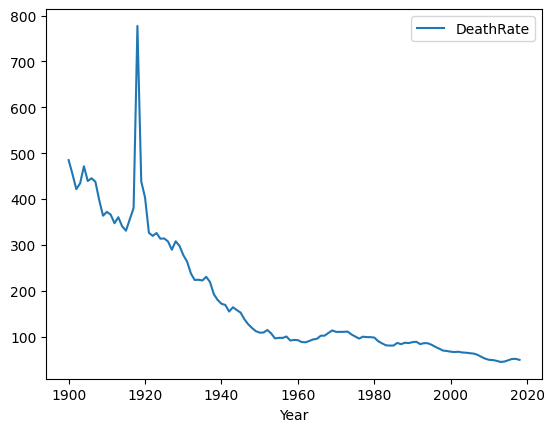

In [94]:
# visualising for the teen_df
teen_df.plot(x='Year',y='DeathRate')

In [95]:
teen_df[teen_df.DeathRate > 500] 

,Year,AgeGroup,DeathRate
375,1918,15-19 Years,777.4


In [100]:
#changing the value in teen_df.DeathRate whose DeathRate is greater than 500
teen_df.loc[teen_df.DeathRate > 500, "DeathRate"] = teen_df.DeathRate.mean()

<Axes: xlabel='Year'>

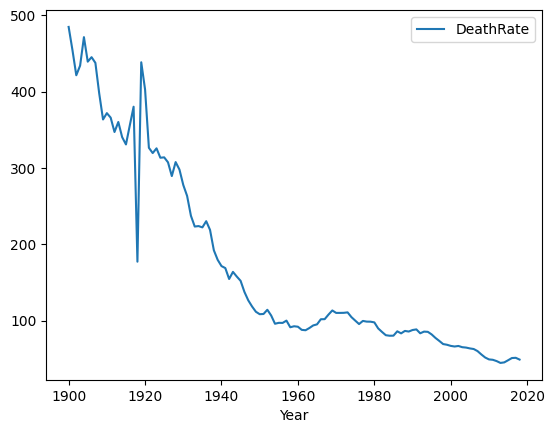

In [101]:
teen_df.plot(x='Year',y='DeathRate')